In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

data preprocessing

In [6]:
startups.drop(labels='State',axis=1,inplace=True)

In [7]:
startups.rename({'R&D Spend':'R_D_Spend','Marketing Spend':'Marketing_Spend'},axis=1,inplace=True)
startups.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


here data already in standard form

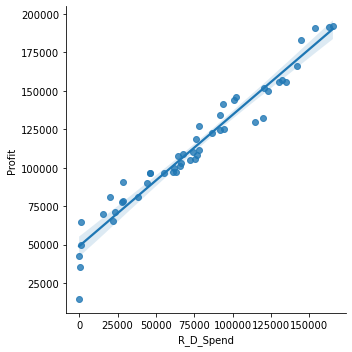

In [8]:
sns.lmplot(x='R_D_Spend',y='Profit',data=startups)

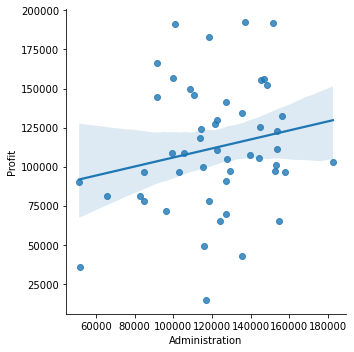

In [9]:
sns.lmplot(x='Administration',y='Profit',data=startups)

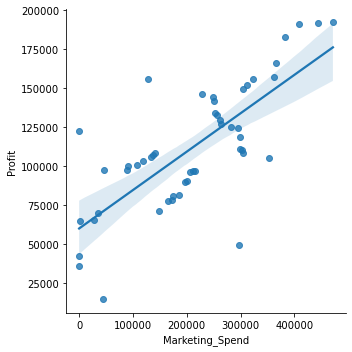

In [10]:
sns.lmplot(x='Marketing_Spend',y='Profit',data=startups)

Model building

In [11]:
x=startups.drop(labels='Profit',axis=1)
y=startups['Profit']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_train.shape

(40, 3)

In [14]:
x_test.shape

(10, 3)

In [15]:
y_train.shape

(40,)

In [16]:
y_test.shape

(10,)

Assumptions check

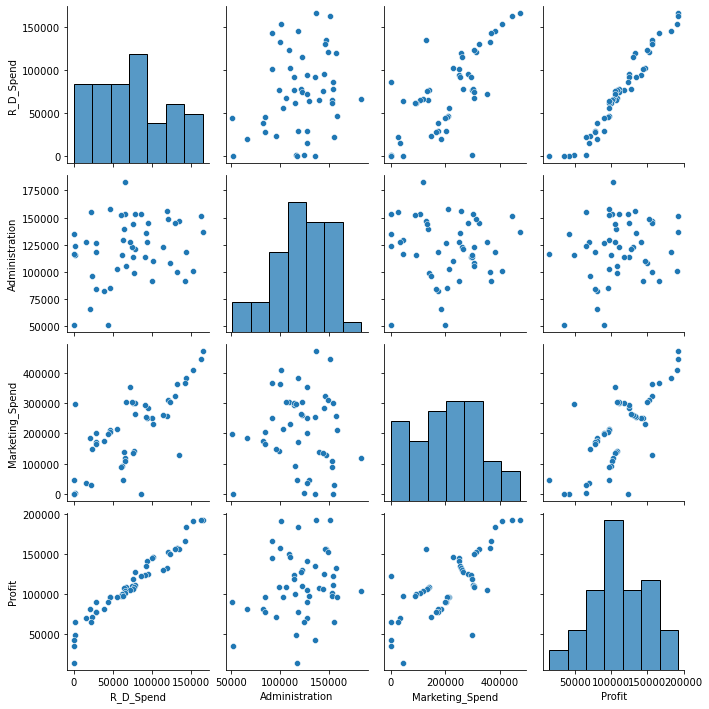

In [17]:
sns.pairplot(startups)

In [18]:
startups.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [19]:
import warnings
warnings.filterwarnings('ignore')

(<AxesSubplot:xlabel='Administration', ylabel='Density'>,
 <AxesSubplot:xlabel='Administration', ylabel='Density'>)

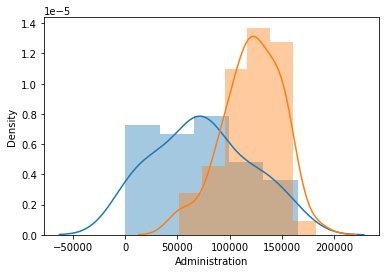

In [20]:
sns.distplot(startups['R_D_Spend']),sns.distplot(startups['Administration'])

<AxesSubplot:xlabel='Marketing_Spend', ylabel='Density'>

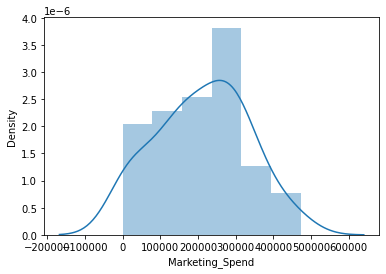

In [21]:
sns.distplot(startups['Marketing_Spend'])

Model training

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [23]:
linear_model.fit(x,y)

LinearRegression()

Model testing

In [24]:
y_pred_train=linear_model.predict(x_train)


In [25]:
y_pred_test=linear_model.predict(x_test)

Model evaluation

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_train,y_pred_train)

0.9423227564710069

In [28]:
r2_score(y_test,y_pred_test)

0.976073531811207

Model optimization

In [29]:
model1=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=startups).fit()

In [30]:
print(model1.params)
print('pvalue is:')
print(model1.pvalues)
print('aic value:',model1.aic)
print('rsquared value:',model1.rsquared)

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64
pvalue is:
Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64
aic value: 1058.7714985998055
rsquared value: 0.9507459940683246


In [31]:
model2=smf.ols('Profit~R_D_Spend+Marketing_Spend',data=startups).fit()

In [32]:
print(model2.params)
print('pvalue is:')
print(model2.pvalues)
print('aic value:',model2.aic)
print('rsquared value:',model2.rsquared)

Intercept          46975.864221
R_D_Spend              0.796584
Marketing_Spend        0.029908
dtype: float64
pvalue is:
Intercept          3.504062e-22
R_D_Spend          6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64
aic value: 1057.070772191826
rsquared value: 0.9504503015559763


In [33]:
model3=smf.ols('Profit~Administration+Marketing_Spend',data=startups).fit()

In [34]:
print(model3.params)
print('pvalue is:')
print(model3.pvalues)
print('aic value:',model3.aic)
print('rsquared value:',model3.rsquared)

Intercept          20224.429059
Administration         0.323673
Marketing_Spend        0.248844
dtype: float64
pvalue is:
Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64
aic value: 1160.2648038638672
rsquared value: 0.6097229746770663


In [35]:
model4=smf.ols('Profit~R_D_Spend+Administration',data=startups).fit()

In [36]:
print(model4.params)
print('pvalue is:')
print(model4.pvalues)
print('aic value:',model4.aic)
print('rsquared value:',model4.rsquared)

Intercept         54886.620628
R_D_Spend             0.862118
Administration       -0.052995
dtype: float64
pvalue is:
Intercept         5.695336e-12
R_D_Spend         2.278348e-31
Administration    2.888932e-01
dtype: float64
aic value: 1059.6636934567293
rsquared value: 0.9478129385009173


the model with least aic value and higher rsquare value gives a good model,in our model when using three coloumn gives better result

calculate VIF

In [37]:
rsd_ad = smf.ols('Administration~R_D_Spend+Marketing_Spend',data=startups).fit().rsquared
vif_ad = 1/(1-rsd_ad)

In [38]:
rsd_rd = smf.ols('R_D_Spend~Administration+Marketing_Spend',data=startups).fit().rsquared
vif_rd = 1/(1-rsd_rd)

In [39]:
rsd_ms = smf.ols('Marketing_Spend~R_D_Spend+Administration',data=startups).fit().rsquared
vif_ms = 1/(1-rsd_ms)

In [40]:
vif_table = pd.DataFrame({'feature':['Administration','R_D_Spend','Marketing_Spend'],'VIF':[vif_ad,vif_rd,vif_ms]})

In [41]:
vif_table

,feature,VIF
0,Administration,1.175091
1,R_D_Spend,2.468903
2,Marketing_Spend,2.326773


vif value lies between 1-3 so it's moderately correlated

Residual analysis

Test for normality of residual(Q-Q plot)

In [42]:
import statsmodels.api as sm

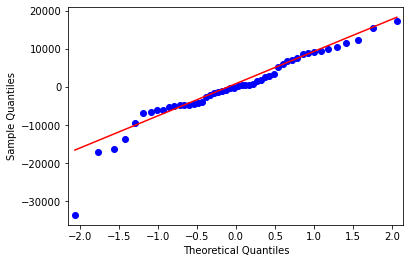

In [43]:
qqplot = sm.qqplot(model1.resid,line='q')

Residualplot for homoscedacity

Text(0, 0.5, 'residual values')

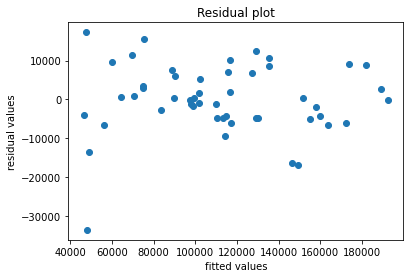

In [44]:
plt.scatter(model1.fittedvalues,model1.resid)
plt.title('Residual plot')
plt.xlabel('fitted values')
plt.ylabel('residual values')

Detecting influences/outliers

In [45]:
model_influence = model1.get_influence()
c,_ = model_influence.cooks_distance

<StemContainer object of 3 artists>

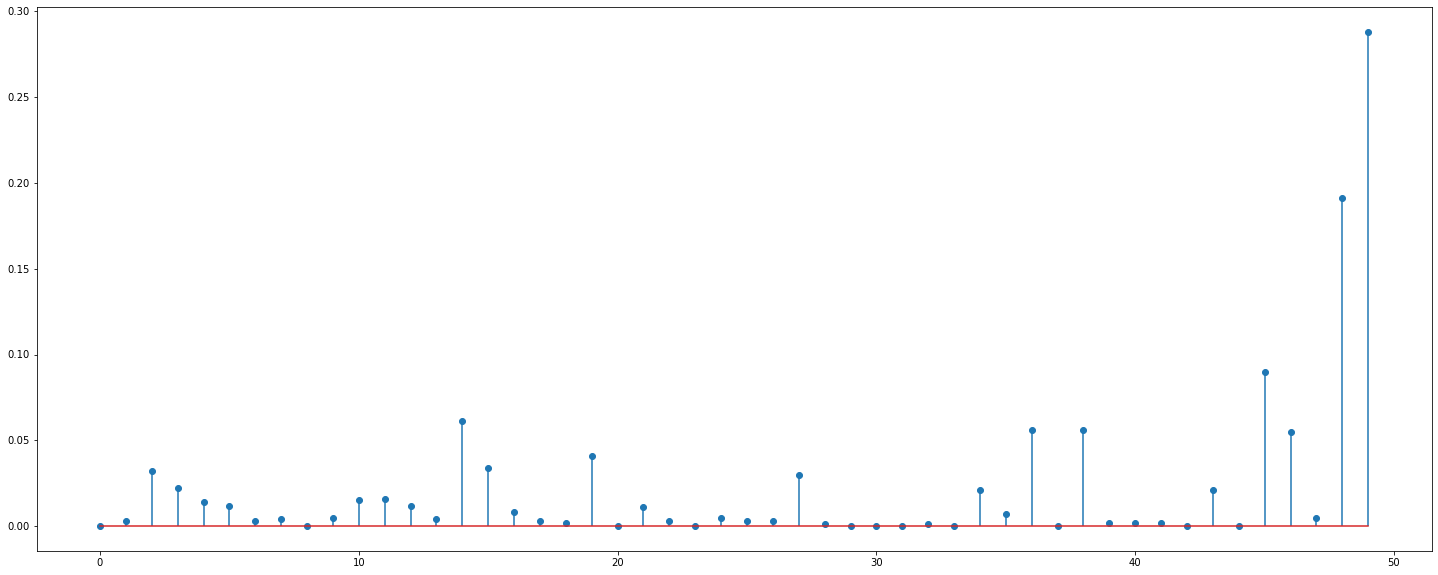

In [46]:
fig_cook= plt.figure(figsize=(25,10))
plt.stem(np.arange(len(startups)),np.round(c,3))

In [47]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

In [48]:
from statsmodels.graphics.regressionplots import influence_plot

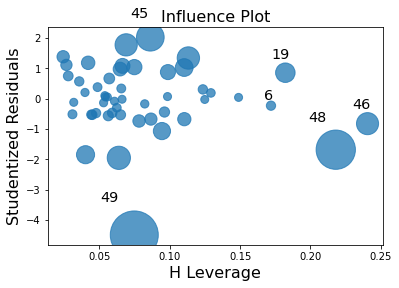

In [49]:
influence_plot(model1)
plt.show()

Model optimization

In [50]:
startups_new=startups

In [51]:
startups_new=startups_new.drop(startups_new.index[49])
startups_new=startups_new.drop(startups_new.index[48])
startups_new=startups_new.drop(startups_new.index[46])

In [52]:
startups_new.reset_index().drop(['index'],axis=1)

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [53]:
startups_new.shape

(47, 4)

In [54]:
model_final=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=startups_new).fit()

In [55]:
print('rsquared:',model_final.rsquared)
print('aic:',model_final.aic)

rsquared: 0.9614129113440602
aic: 973.2489443962857


In [56]:
predicted=model_final.predict()

In [57]:
startups_new['predicted']=predicted

In [58]:
startups_new

,R_D_Spend,Administration,Marketing_Spend,Profit,predicted
0,165349.20,136897.80,471784.10,192261.83,189144.021141
1,162597.70,151377.59,443898.53,191792.06,185571.505316
2,153441.51,101145.55,407934.54,191050.39,180343.992254
3,144372.41,118671.85,383199.62,182901.99,171860.489927
4,142107.34,91391.77,366168.42,166187.94,171153.336127
5,131876.90,99814.71,362861.36,156991.12,162804.123770
6,134615.46,147198.87,127716.82,156122.51,156477.343357
7,130298.13,145530.06,323876.68,155752.60,158187.870039
8,120542.52,148718.95,311613.29,152211.77,150255.251593
9,123334.88,108679.17,304981.62,149759.96,154352.656745
